In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
from pyspark import SparkContext
from pyspark.sql import SparkSession
from pyspark.sql.functions import col
import matplotlib.pyplot as plt

from sklearn.decomposition import FactorAnalysis, PCA
from sklearn.preprocessing import StandardScaler, LabelEncoder

# Year to investigate
# Year 2015 contains records from 2015 - 2022
YEAR = 2015


In [3]:
data = pd.read_parquet("metrics/metrics_questions_" + str(YEAR)) #NOW A REGULAR DATAFRAME
copy = data

In [4]:
labels = data["target"]
numeric_variables = ['FG', 'FE', 'CL', 'CP', 'CSPT', 'CSTT', "SENT", "_Score", "target_cat"]
#numeric_variables = ['FG', 'FE', 'CL', 'CP', 'CSPT', 'CSTT', "SENT", "_AnswerCount", "_ViewCount", "_FavoriteCount", "_CommentCount", "_Score", "target_cat"]
# answer_types = ('BestAnswered', 'Answered', 'Unanswered')
labelencoder = LabelEncoder()# Assigning numerical values and storing in another column
data['target_cat'] = labelencoder.fit_transform(data['target'])
data = data.drop("target",axis=1)
data = data[numeric_variables]

# metrics = data.drop("target", axis=1)
X = StandardScaler().fit_transform(data)
print(data.head())

          FG         FE         CL        CP      CSPT      CSTT    SENT  \
0  13.732593  44.696667  16.859259  0.000000  0.115511  0.305199  0.5023   
1   9.908519  72.113333  15.334815  0.287605  0.113803  0.000000  0.3252   
2   8.884737  76.484825  14.288421  0.878933  0.124697  0.068050  0.6124   
3   8.757857  65.520476  17.474286  0.545517  0.116394  0.125367 -0.8611   
4   5.910010  87.549562  14.920292  0.754415  0.112047  0.318784  0.0000   

   _Score  target_cat  
0     0.0           2  
1     4.0           0  
2     0.0           0  
3     7.0           2  
4     1.0           2  


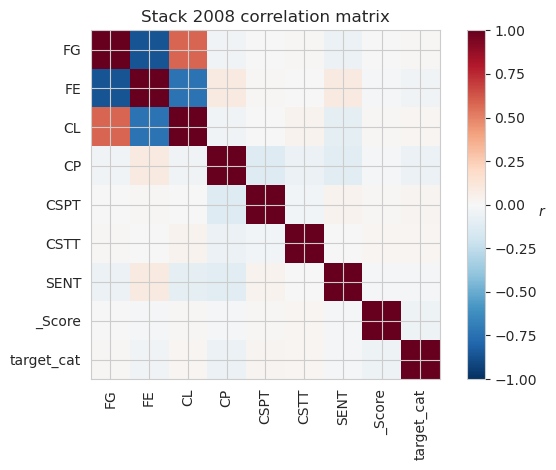

In [6]:
ax = plt.axes()

im = ax.imshow(np.corrcoef(X.T), cmap="RdBu_r", vmin=-1, vmax=1)

#ax.set_xticks([0, 1, 2, 3,4,5,6,7,8,9,10,11,12])
ax.set_xticks([0, 1, 2, 3,4,5,6,7,8])
ax.set_xticklabels(numeric_variables, rotation=90)
#ax.set_yticks([0, 1, 2, 3,4,5,6,7,8,9,10,11,12])
ax.set_yticks([0, 1, 2, 3,4,5,6,7,8])
ax.set_yticklabels(numeric_variables)

plt.colorbar(im).ax.set_ylabel("$r$", rotation=0)
ax.set_title("Stack 2008 correlation matrix")
plt.tight_layout()

In [ ]:
pca = PCA(n_components=3)
pca.fit(X)
X_pca = pca.transform(X)



In [ ]:
y = data['target_cat']
cdict = {0:'red',1:'green', 2:'blue'}
lable = dict(zip(labelencoder.classes_, labelencoder.transform(labelencoder.classes_)))
print(lable)
marker = {0:'*',1:'o', 2:'-'}
alpha = {0:.3, 1:.5, 2:.7}


ex_variance=np.var(X_pca,axis=0)
ex_variance_ratio = ex_variance/np.sum(ex_variance)
ex_variance_ratio

Xax = X_pca[:,0]
Yax = X_pca[:,1]
Zax = X_pca[:,2]

fig = plt.figure(figsize=(7,5))
ax = fig.add_subplot(111, projection='3d')

fig.patch.set_facecolor('white')
for l in np.unique(y):
    ix=np.where(y==l)
    ax.scatter(Xax[ix], Yax[ix], Zax[ix], c=cdict[l], s=40,
               label=lable[l], marker=marker[l], alpha=alpha[l])
# for loop ends
ax.set_xlabel("First Principal Component", fontsize=14)
ax.set_ylabel("Second Principal Component", fontsize=14)
ax.set_zlabel("Third Principal Component", fontsize=14)

ax.legend()
plt.show()

In [ ]:
from sklearn.manifold import TSNE
import pandas as pd
import seaborn as sns
y = data['target_cat']
# We want to get TSNE embedding with 2 dimensions
n_components = 2
tsne = TSNE(n_components)
tsne_result = tsne.fit_transform(X)
print(tsne_result.shape)
# (1000, 2)
# Two dimensions for each of our images

# Plot the result of our TSNE with the label color coded
# A lot of the stuff here is about making the plot look pretty and not TSNE
tsne_result_df = pd.DataFrame({'tsne_1': tsne_result[:,0], 'tsne_2': tsne_result[:,1], 'label': y})
fig, ax = plt.subplots(1)
sns.scatterplot(x='tsne_1', y='tsne_2', hue='label', data=tsne_result_df, ax=ax,s=120)
lim = (tsne_result.min()-5, tsne_result.max()+5)
ax.set_xlim(lim)
ax.set_ylim(lim)
ax.set_aspect('equal')
ax.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.0)